In [10]:
import pickle
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
norm = Normalize(vmin=0,vmax=1)

In [11]:
with open("results_1v1.pickle", 'rb') as f:
    results = pickle.load(f)
    
datasets = list(results.keys())

In [12]:
def accuracy(train, test, pred_type='preds_naive'):
    return accuracy_score(results[train][test]['y_test'],
                          results[train][test][pred_type])

In [13]:
accuracy_matrices = {}
for pred_type in ["preds_naive", "preds_lr", "preds_xgb"]:
    accuracies_matrix = []

    for train in datasets:
        accuracies_matrix.append([])
        for test in datasets:
            try:
                accuracies_matrix[-1].append(accuracy(train, test, pred_type=pred_type))

            except KeyError:
                accuracies_matrix[-1].append(0)
                
    accuracy_matrices[pred_type] = accuracies_matrix

In [14]:
def plot_am(accuracies_matrix, title=""):
    fig, ax = plt.subplots()

    ax.matshow(accuracies_matrix, cmap=plt.cm.Blues, norm=norm)
    ax.set_xticklabels(['']+datasets)
    ax.set_yticklabels(['']+datasets)
    ax.set_xlabel("Test dataset")
    ax.set_ylabel("Train dataset")
    ax.set_title(title)

    for i in range(4):
        for j in range(4):
            ax.text(i, j, "{0:.2f}".format(accuracies_matrix[j][i]), va='center', ha='center', color='white')
            
    fig.tight_layout()

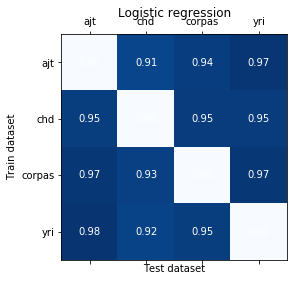

In [15]:
plot_am(accuracy_matrices['preds_lr'], title="Logistic regression")

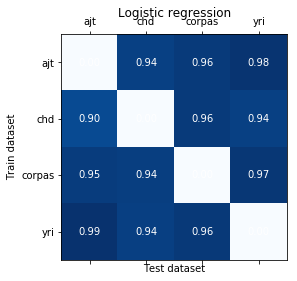

In [16]:
plot_am(accuracy_matrices['preds_xgb'], title="Logistic regression")

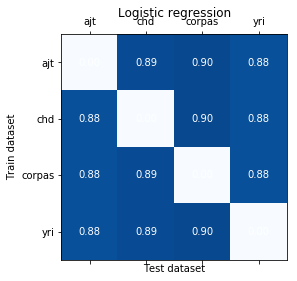

In [17]:
plot_am(accuracy_matrices['preds_naive'], title="Logistic regression")